In [22]:
import zipfile

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV


In [23]:
data = pd.read_csv('training_mush.csv')
X = data.drop('class',axis=1)
y = data['class']

In [24]:
clf_rf = RandomForestClassifier(random_state=0)

In [25]:
parametrs =  {'n_estimators': range(10,50,10),
              'max_depth': range(1,12,2),
              'min_samples_leaf': range(1,7),
              'min_samples_split': range(2,9,2)}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3,  n_jobs=-1)

In [26]:
grid_search_cv_clf.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [27]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [28]:
best_clf = grid_search_cv_clf.best_estimator_
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X.columns),
                                       'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [29]:
test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [31]:
res = best_clf.predict(test)

In [44]:
res.sum()

976

In [48]:
passwd = b'Cool!Move_forward!'

import zipfile
zcsv = zipfile.ZipFile('testing_y_mush.csv.zip')
y_test = pd.read_csv(
        zcsv.open(zcsv.infolist()[0], mode='r', pwd=passwd)
    )


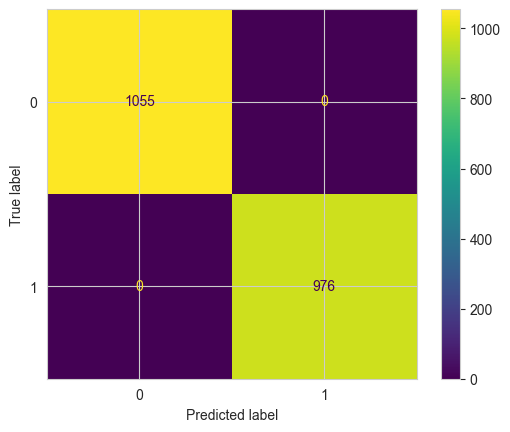

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_clf, test, y_test)